# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [12]:
#Base url to work off
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

City not found. skipping.
Processing record 1|hermanus
Processing record 2|abrantes
Processing record 3|hobart
Processing record 4|kapaa
City not found. skipping.
Processing record 5|mar del plata
Processing record 6|san quintin
Processing record 7|bluff
Processing record 8|candolim
Processing record 9|hithadhoo
Processing record 10|jamestown
Processing record 11|shahrud
Processing record 12|chama
Processing record 13|albany
Processing record 14|yellowknife
Processing record 15|san jose
Processing record 16|cajaruro
Processing record 17|rikitea
Processing record 18|qaanaaq
Processing record 19|goderich
Processing record 20|lavrentiya
Processing record 21|geraldton
Processing record 22|ewa beach
Processing record 23|georgetown
Processing record 24|domsod
Processing record 25|aklavik
Processing record 26|arraial do cabo
Processing record 27|port elizabeth
Processing record 28|punta arenas
Processing record 29|brigantine
Processing record 30|aguimes
Processing record 31|tuktoyaktuk
Proces

City not found. skipping.
Processing record 249|entre rios
Processing record 250|warrnambool
Processing record 251|puerto rondon
Processing record 252|skibbereen
Processing record 253|laguna
Processing record 254|beringovskiy
City not found. skipping.
Processing record 255|pisco
Processing record 256|kuryk
Processing record 257|kuybyshevo
Processing record 258|chapais
Processing record 259|tommot
Processing record 260|kapit
Processing record 261|fenoarivo
Processing record 262|anadyr
Processing record 263|kota kinabalu
Processing record 264|cherskiy
City not found. skipping.
Processing record 265|lorengau
Processing record 266|carauari
Processing record 267|la rochelle
Processing record 268|praia da vitoria
City not found. skipping.
Processing record 269|tambovka
Processing record 270|cukai
Processing record 271|camacha
Processing record 272|mahibadhoo
Processing record 273|uptar
Processing record 274|luwuk
Processing record 275|vestmanna
Processing record 276|les cayes
City not found.

Processing record 496|forest grove
Processing record 497|mehriz
City not found. skipping.
City not found. skipping.
Processing record 498|mackay
Processing record 499|toora-khem
Processing record 500|wanaka
Processing record 501|vila do maio
Processing record 502|bacolod
Processing record 503|gilroy
Processing record 504|barcelos
Processing record 505|pimenta bueno
City not found. skipping.
Processing record 506|kuandian
Processing record 507|pingliang
Processing record 508|punta cardon
Processing record 509|inhambane
Processing record 510|dalvik
Processing record 511|traverse city
Processing record 512|marquette
Processing record 513|barra patuca
Processing record 514|yar-sale
Processing record 515|omboue
City not found. skipping.
Processing record 516|san bartolome
Processing record 517|santa cruz
Processing record 518|amberley
Processing record 519|takoradi
Processing record 520|buala
Processing record 521|abbeville
Processing record 522|sinnamary
Processing record 523|oranjestad
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
#Creating city dataframe and exporting city data into a csv
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("../output_data/cities.csv")

#Displaying dataframe
city_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Hermanus,100,ZA,1650748282,66,-34.4187,19.2345,58.91,5.91
1,Abrantes,2,PT,1650748283,94,39.4667,-8.2000,51.73,4.68
2,Hobart,20,AU,1650748283,88,-42.8794,147.3294,47.01,6.91
3,Kapaa,75,US,1650748283,79,22.0752,-159.3190,80.58,14.97
4,Mar del Plata,0,AR,1650748284,35,-38.0023,-57.5575,71.62,13.80


In [19]:
# Data Count
city_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [23]:
# Generate a summary statistics table of mean, median, variance, and standard deviation, humidity for each city

# Use groupby and summary statistical methods to calculate the following properties of each city humidity: 
# mean, median, variance, and standard deviation. 
# Assemble the resulting series into a single summary dataframe.

mean=city_df.groupby('City')['Humidity'].mean()
median=city_df.groupby('City')['Humidity'].median()
variance=city_df.groupby('City')['Humidity'].var()
standard_dv=city_df.groupby('City')['Humidity'].std()

summary_city_df=pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv})
summary_city_df

,Mean,Median,Variance,Standard Deviation
City,,,,
Abbeville,89.0,89.0,NaN,NaN
Abrantes,94.0,94.0,NaN,NaN
Abu Dhabi,82.0,82.0,NaN,NaN
Abu Kamal,10.0,10.0,NaN,NaN
Abu Samrah,18.0,18.0,NaN,NaN
...,...,...,...,...
Yulara,55.0,55.0,NaN,NaN
Yumen,23.0,23.0,NaN,NaN
Yārāda,82.0,82.0,NaN,NaN


In [ ]:
#Based on above information it can be assumed that most cities have humidity that fall below or is at 100%

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#  Get the indices of cities that have humidity over 100%.


In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

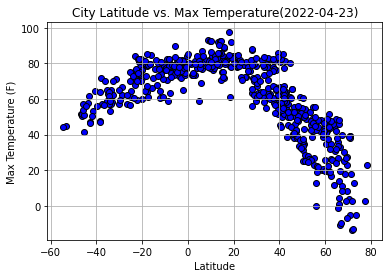

In [27]:
#Converting Date for title of plot
timestamp = city_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

#Creating plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({shortened_timestamp})")
plt.savefig("../output_data/Lat_vs_temp_plot")
plt.show()

## Latitude vs. Humidity Plot

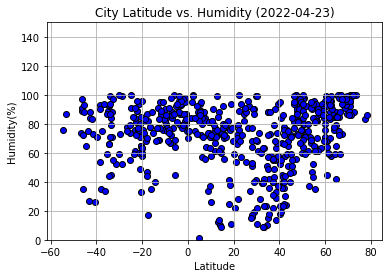

In [28]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("../output_data/Lat_vs_humidity_plot")
plt.show()

## Latitude vs. Cloudiness Plot

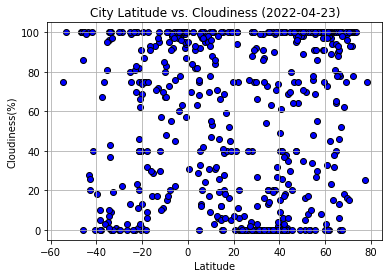

In [29]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("../output_data/Lat_vs_cloudiness_plot")
plt.show()

## Latitude vs. Wind Speed Plot

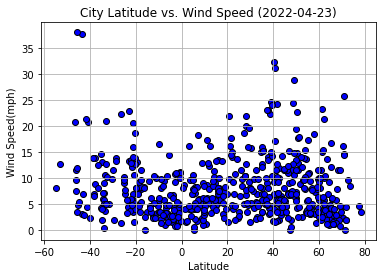

In [30]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("../output_data/Lat_vs_windSpeed_plot")
plt.show()

## Linear Regression

In [31]:
# Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]
#print(Southern_hemisphere.count(),Northern_hemisphere.count())

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.855708705869645


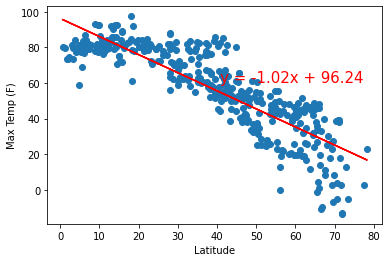

None


In [33]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7828836063742097


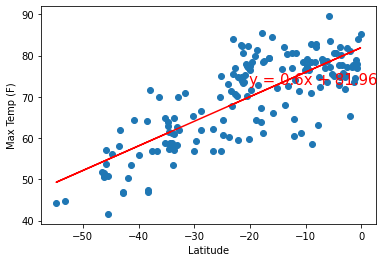

None


In [35]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")

print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22230462705461898


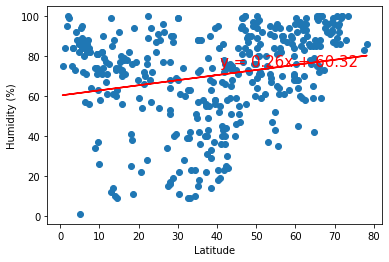

None


In [36]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21267343528869392


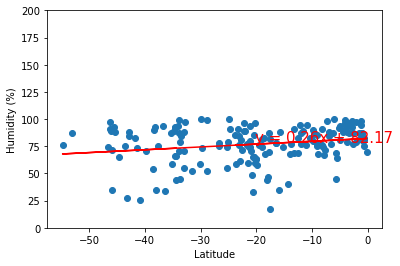

None


In [37]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17866794249986667


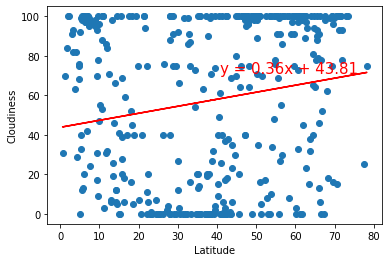

None


In [38]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27868557103392816


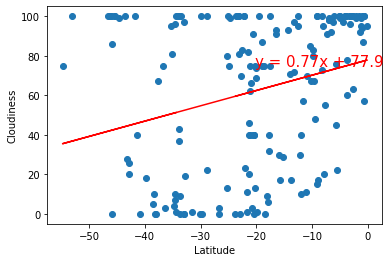

None


In [39]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0024534020162598133


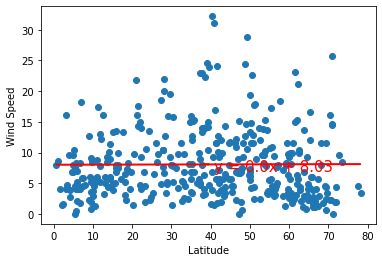

None


In [40]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.36544124754538926


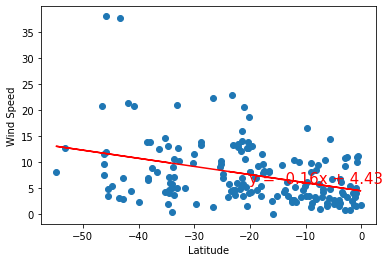

None


In [41]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))